In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
pd.set_option('display.max_columns', None)

In [2]:
allcounties = gpd.read_file('../data/uscounties/cb_2021_us_county_5m.shp')
allcounties.head(60)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,01,059,00161555,0500000US01059,01059,Franklin,Franklin County,AL,Alabama,06,1641845708,32639621,"POLYGON ((-88.16591 34.38093, -88.16563 34.383..."
1,06,057,01682927,0500000US06057,06057,Nevada,Nevada County,CA,California,06,2480587301,41531993,"POLYGON ((-121.27953 39.23054, -121.25918 39.2..."
2,26,031,01622958,0500000US26031,26031,Cheboygan,Cheboygan County,MI,Michigan,06,1852564001,440607445,"POLYGON ((-84.73269 45.28938, -84.73239 45.787..."
3,29,119,00758518,0500000US29119,29119,McDonald,McDonald County,MO,Missouri,06,1397155452,520251,"POLYGON ((-94.61831 36.76656, -94.06890 36.747..."
4,31,157,00835900,0500000US31157,31157,Scotts Bluff,Scotts Bluff County,NE,Nebraska,06,1915576079,15402683,"POLYGON ((-104.05293 41.90614, -104.05299 41.9..."
5,37,011,01008536,0500000US37011,37011,Avery,Avery County,NC,North Carolina,06,640602137,445285,"POLYGON ((-82.08014 36.10572, -82.07974 36.106..."
6,46,039,01265781,0500000US46039,46039,Deuel,Deuel County,SD,South Dakota,06,1612885711,35935421,"POLYGON ((-96.88457 44.80444, -96.88235 44.976..."
7,48,495,01384033,0500000US48495,48495,Winkler,Winkler County,TX,Texas,06,2178876165,19838,"POLYGON ((-103.32650 32.00037, -103.27852 32.0..."
8,54,061,01550037,0500000US54061,54061,Monongalia,Monongalia County,WV,West Virginia,06,932632921,14991505,"POLYGON ((-80.42139 39.72119, -80.30946 39.721..."
9,05,137,00069902,0500000US05137,05137,Stone,Stone County,AR,Arkansas,06,1570673294,8145444,"POLYGON ((-92.41685 35.78863, -92.41440 35.975..."


In [3]:
type(allcounties)

geopandas.geodataframe.GeoDataFrame

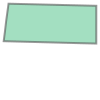

In [4]:
allcounties.loc[0, 'geometry']

In [5]:
print(allcounties.loc[0, 'geometry'])

POLYGON ((-88.16591 34.380926, -88.165634 34.383102, -88.15629199999999 34.463214, -88.139988 34.581703, -87.529667 34.567081, -87.52972200000001 34.304598, -87.634725 34.306997, -88.173632 34.321054, -88.16591 34.380926))


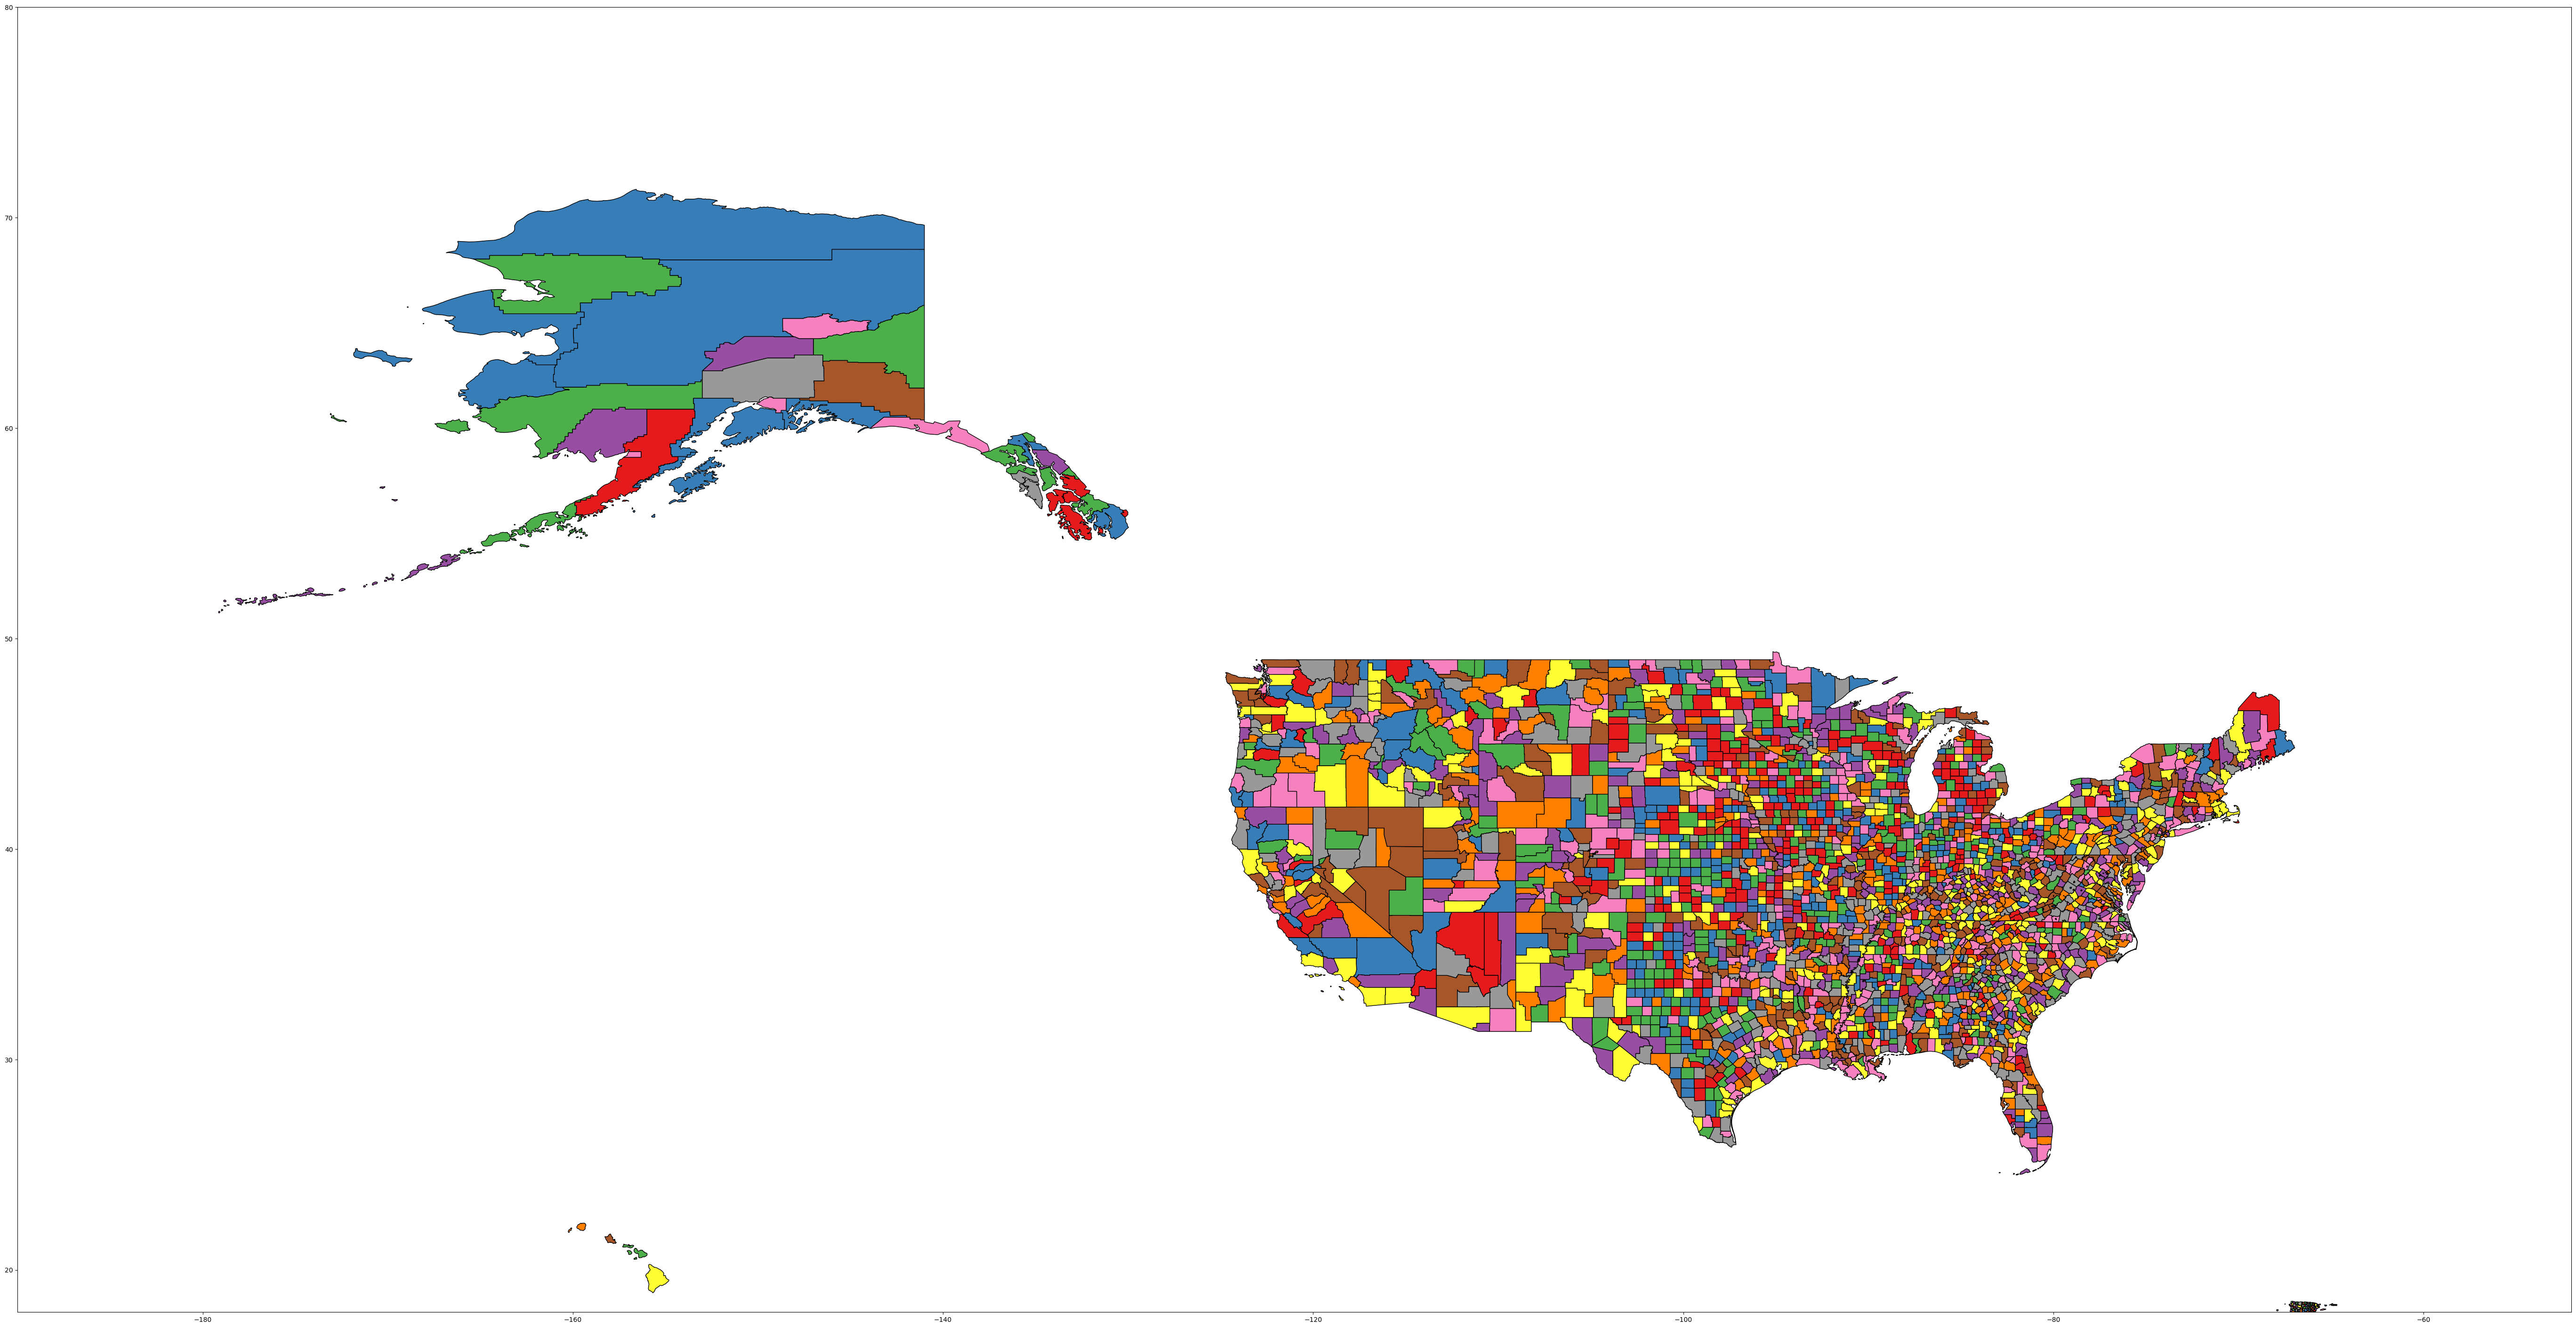

In [23]:
allcounties.plot(figsize=(70,70), edgecolor='black', cmap = 'Set1')
plt.ylim(18, 80)
plt.xlim(-190, -52);

<AxesSubplot:>

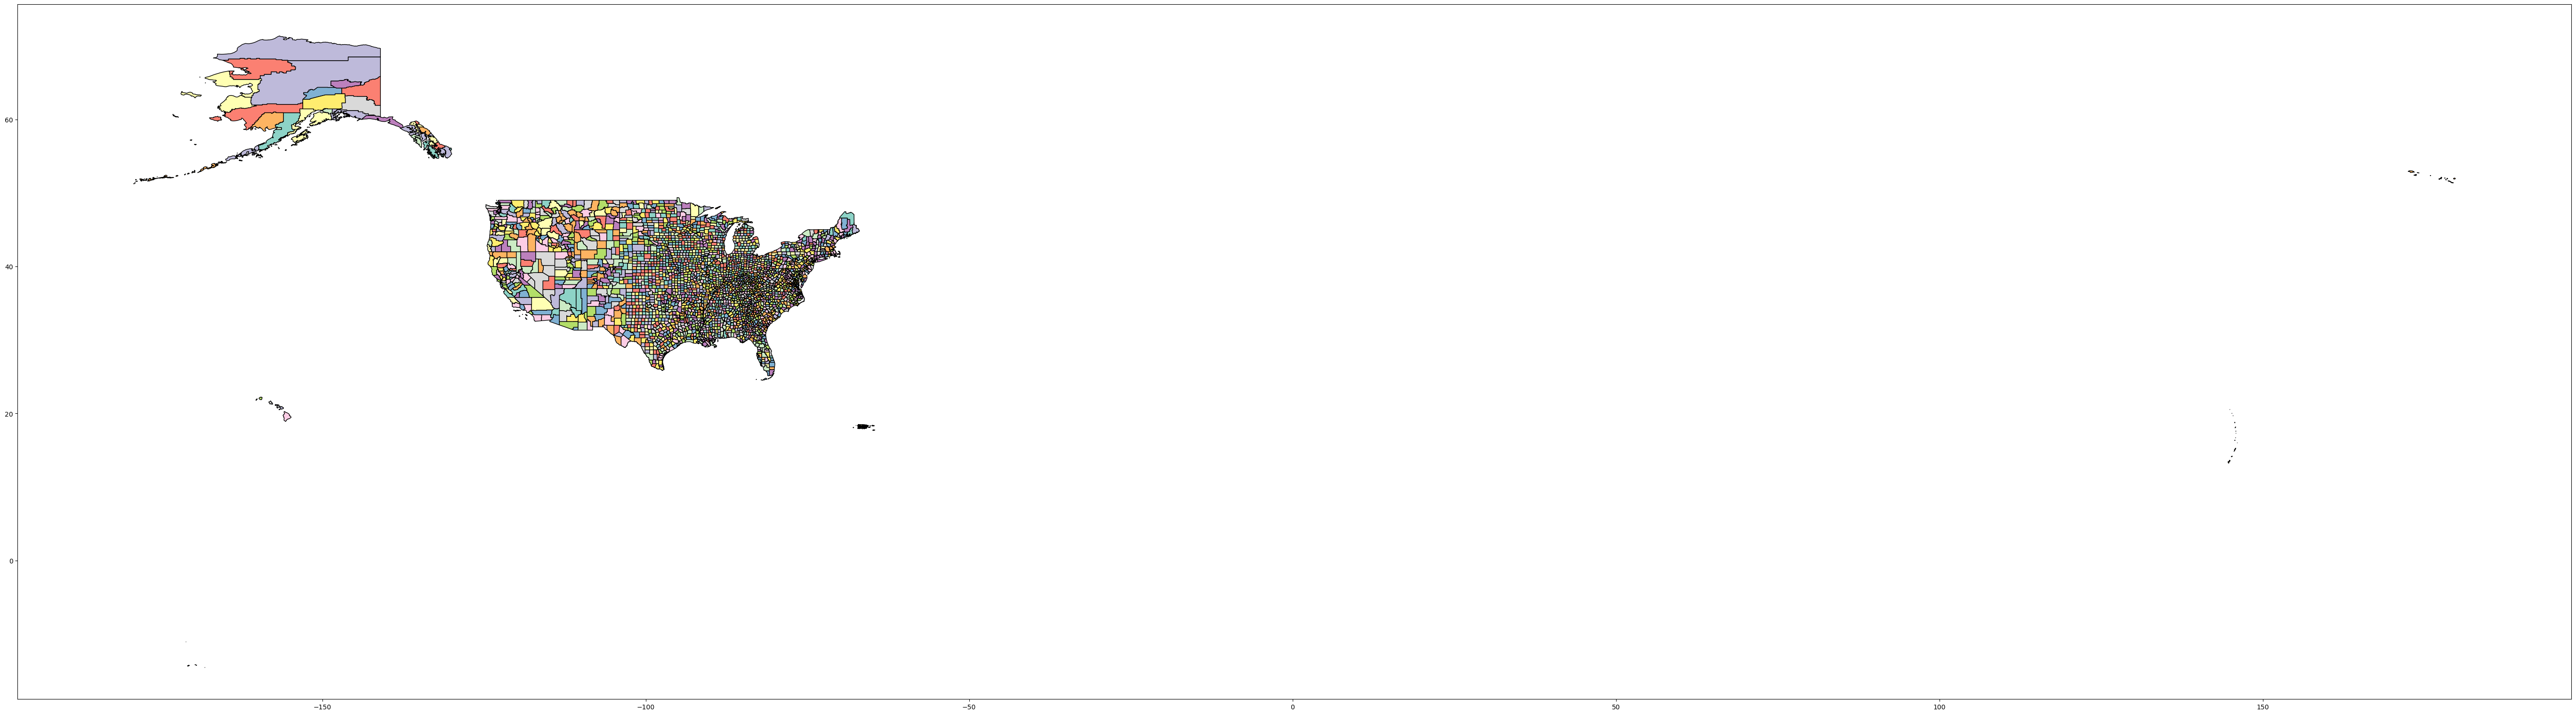

In [7]:
allcounties.plot(figsize=(70,70), edgecolor='black', cmap = 'Set3')

In [8]:
TN = allcounties.loc[(allcounties['STUSPS'] == 'TN')]
TN

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
33,47,109,01639774,0500000US47109,47109,McNairy,McNairy County,TN,Tennessee,06,1457753351,1994997,"POLYGON ((-88.78673 35.12508, -88.78177 35.247..."
71,47,169,01648581,0500000US47169,47169,Trousdale,Trousdale County,TN,Tennessee,06,296143586,5960709,"POLYGON ((-86.28326 36.34750, -86.27249 36.358..."
125,47,075,01639753,0500000US47075,47075,Haywood,Haywood County,TN,Tennessee,06,1380741528,2472509,"POLYGON ((-89.48270 35.59395, -89.46999 35.595..."
150,47,101,01639765,0500000US47101,47101,Lewis,Lewis County,TN,Tennessee,06,730614739,1024940,"POLYGON ((-87.71101 35.50529, -87.69065 35.505..."
221,47,069,01639750,0500000US47069,47069,Hardeman,Hardeman County,TN,Tennessee,06,1729509842,6768751,"POLYGON ((-89.18394 35.39713, -89.18255 35.432..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,47,057,01648575,0500000US47057,47057,Grainger,Grainger County,TN,Tennessee,06,726715759,56600343,"POLYGON ((-83.73270 36.16458, -83.71470 36.173..."
3096,47,089,01639759,0500000US47089,47089,Jefferson,Jefferson County,TN,Tennessee,06,712437477,101637984,"POLYGON ((-83.70925 36.09323, -83.69129 36.094..."
3098,47,187,01639801,0500000US47187,47187,Williamson,Williamson County,TN,Tennessee,06,1509607196,3017704,"POLYGON ((-87.20143 35.94058, -87.20424 35.959..."
3123,47,103,01639766,0500000US47103,47103,Lincoln,Lincoln County,TN,Tennessee,06,1477179214,971039,"POLYGON ((-86.82830 35.26368, -86.74690 35.252..."


In [9]:
TN.shape

(95, 13)

In [10]:
from matplotlib import pyplot as plt
from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch

<AxesSubplot:>

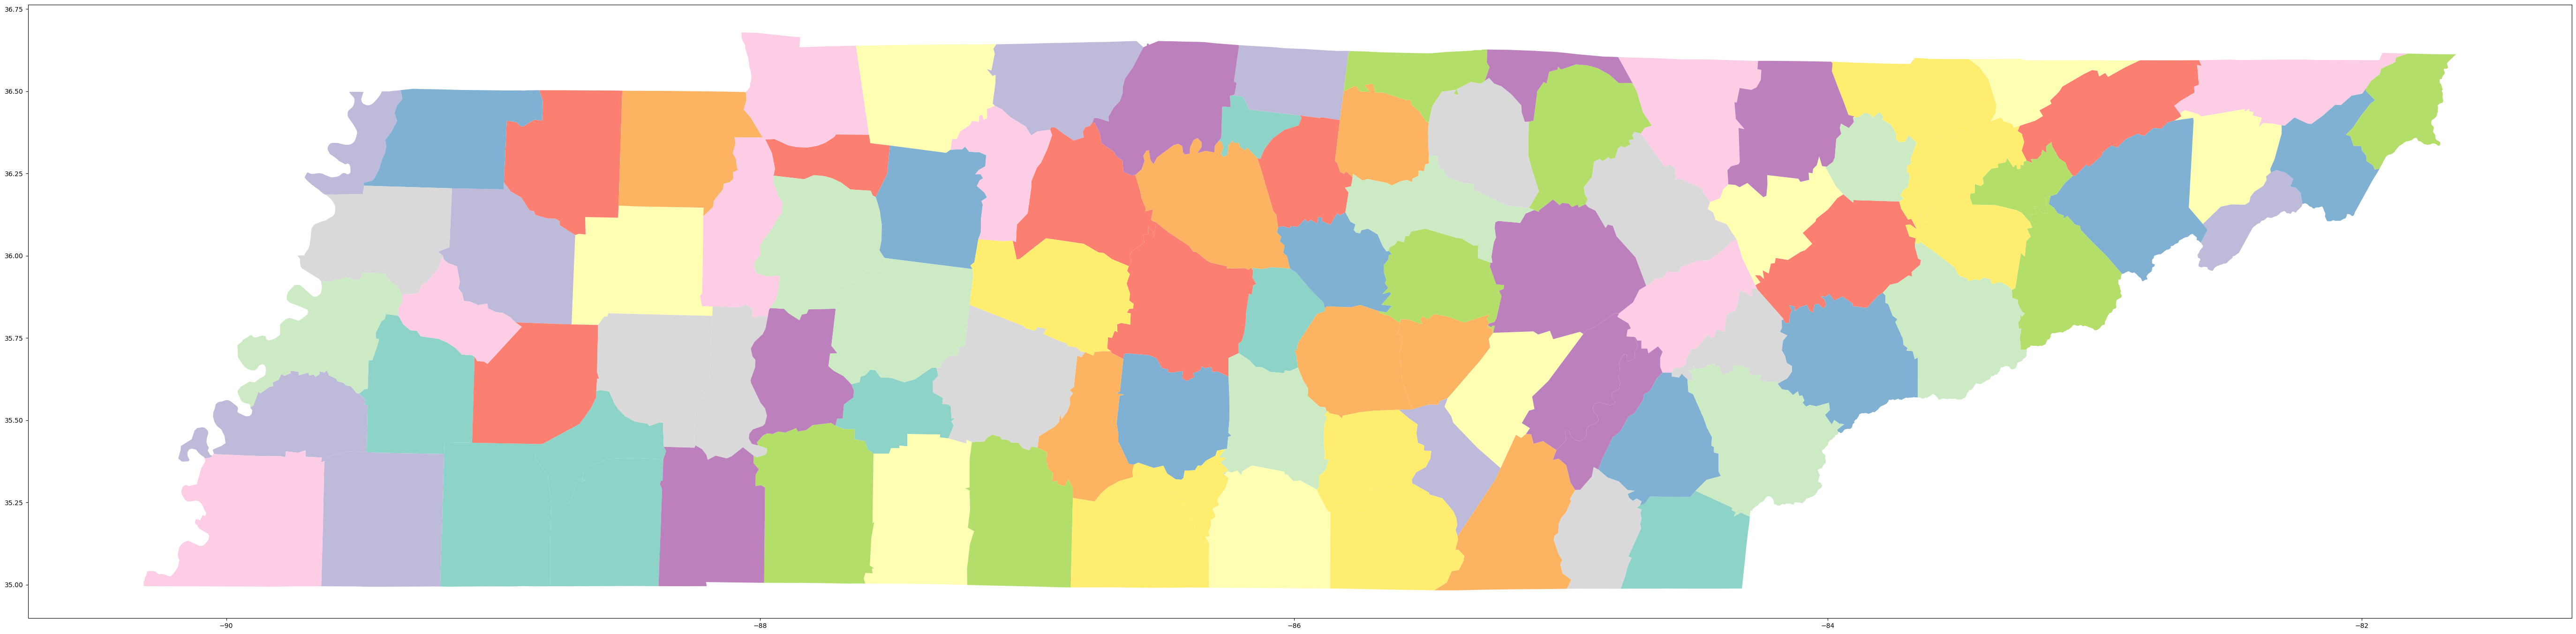

In [11]:
TNMAP = TN.plot(figsize=(70,70), cmap = 'Set3')
TNMAP

In [12]:
TN.rename(columns = {'NAME':'County', 'STATE_NAME':'State'}, inplace = True)
TN

C:\Users\HP\AppData\Local\Temp\ipykernel_14292\3844642348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TN.rename(columns = {'NAME':'County', 'STATE_NAME':'State'}, inplace = True)


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,County,NAMELSAD,STUSPS,State,LSAD,ALAND,AWATER,geometry
33,47,109,01639774,0500000US47109,47109,McNairy,McNairy County,TN,Tennessee,06,1457753351,1994997,"POLYGON ((-88.78673 35.12508, -88.78177 35.247..."
71,47,169,01648581,0500000US47169,47169,Trousdale,Trousdale County,TN,Tennessee,06,296143586,5960709,"POLYGON ((-86.28326 36.34750, -86.27249 36.358..."
125,47,075,01639753,0500000US47075,47075,Haywood,Haywood County,TN,Tennessee,06,1380741528,2472509,"POLYGON ((-89.48270 35.59395, -89.46999 35.595..."
150,47,101,01639765,0500000US47101,47101,Lewis,Lewis County,TN,Tennessee,06,730614739,1024940,"POLYGON ((-87.71101 35.50529, -87.69065 35.505..."
221,47,069,01639750,0500000US47069,47069,Hardeman,Hardeman County,TN,Tennessee,06,1729509842,6768751,"POLYGON ((-89.18394 35.39713, -89.18255 35.432..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,47,057,01648575,0500000US47057,47057,Grainger,Grainger County,TN,Tennessee,06,726715759,56600343,"POLYGON ((-83.73270 36.16458, -83.71470 36.173..."
3096,47,089,01639759,0500000US47089,47089,Jefferson,Jefferson County,TN,Tennessee,06,712437477,101637984,"POLYGON ((-83.70925 36.09323, -83.69129 36.094..."
3098,47,187,01639801,0500000US47187,47187,Williamson,Williamson County,TN,Tennessee,06,1509607196,3017704,"POLYGON ((-87.20143 35.94058, -87.20424 35.959..."
3123,47,103,01639766,0500000US47103,47103,Lincoln,Lincoln County,TN,Tennessee,06,1477179214,971039,"POLYGON ((-86.82830 35.26368, -86.74690 35.252..."


In [13]:
counties_all = pd.read_csv('../data/usa_counties_contig.csv')
print(counties_all.shape)
counties_all.head(3)

FileNotFoundError: [Errno 2] No such file or directory: '../data/usa_counties_contig.csv'

In [ ]:
TNfull = pd.merge(left = TN, right = counties_all, how='inner',
                    on = ('County', 'State'))
TNfull

In [ ]:
TNfull.crs

In [ ]:
TNfull = TNfull.to_crs(epsg=4326)
print(TNfull.crs)
TNfull.head()

In [ ]:
TNfull.plot(figsize=(6, 6))
plt.show()

In [ ]:
m = folium.Map(location=[36.5, -81], zoom_start=10, tiles='CartoDB positron')
m

In [ ]:
for _, r in TNfull.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['County']).add_to(geo_j)
    geo_j.add_to(m)
m

In [ ]:
# Project to NAD83 projected crs
TNfull = TNfull.to_crs(epsg=2263)

# Access the centroid attribute of each polygon
TNfull['centroid'] = TNfull.centroid

In [ ]:
# Project to WGS84 geographic crs

# geometry (active) column
TNfull = TNfull.to_crs(epsg=4326)

# Centroid column
TNfull['centroid'] = TNfull['centroid'].to_crs(epsg=4326)

TNfull.head()

In [ ]:
from folium.plugins import HeatMap

#Make the list of Lat an Lng
lat = TNfull.latitude.tolist()
lng = TNfull.longitude.tolist()

#Create the Map
map = folium.Map(
    location=[55.838913, 12.055415],
    tiles='cartodbdark_matter',
    zoom_start=11
)
HeatMap(list(zip(lat, lng))).add_to(map)
map

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
TNfull.plot(column = 'Life Expectancy', 
              cmap = 'GnBu',  
              legend = True,
              ax = ax)
ax.axis('off');

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
TNfull.plot(column = 'Median Household Income', 
              cmap = 'GnBu',  
              legend = True,
              ax = ax)
ax.axis('off');

In [ ]:
TNfolium = folium.Map(location=[bike_station_locations.Latitude.mean(), bike_station_locations.Longitude.mean()], zoom_start=14, control_scale=True

<AxesSubplot:>

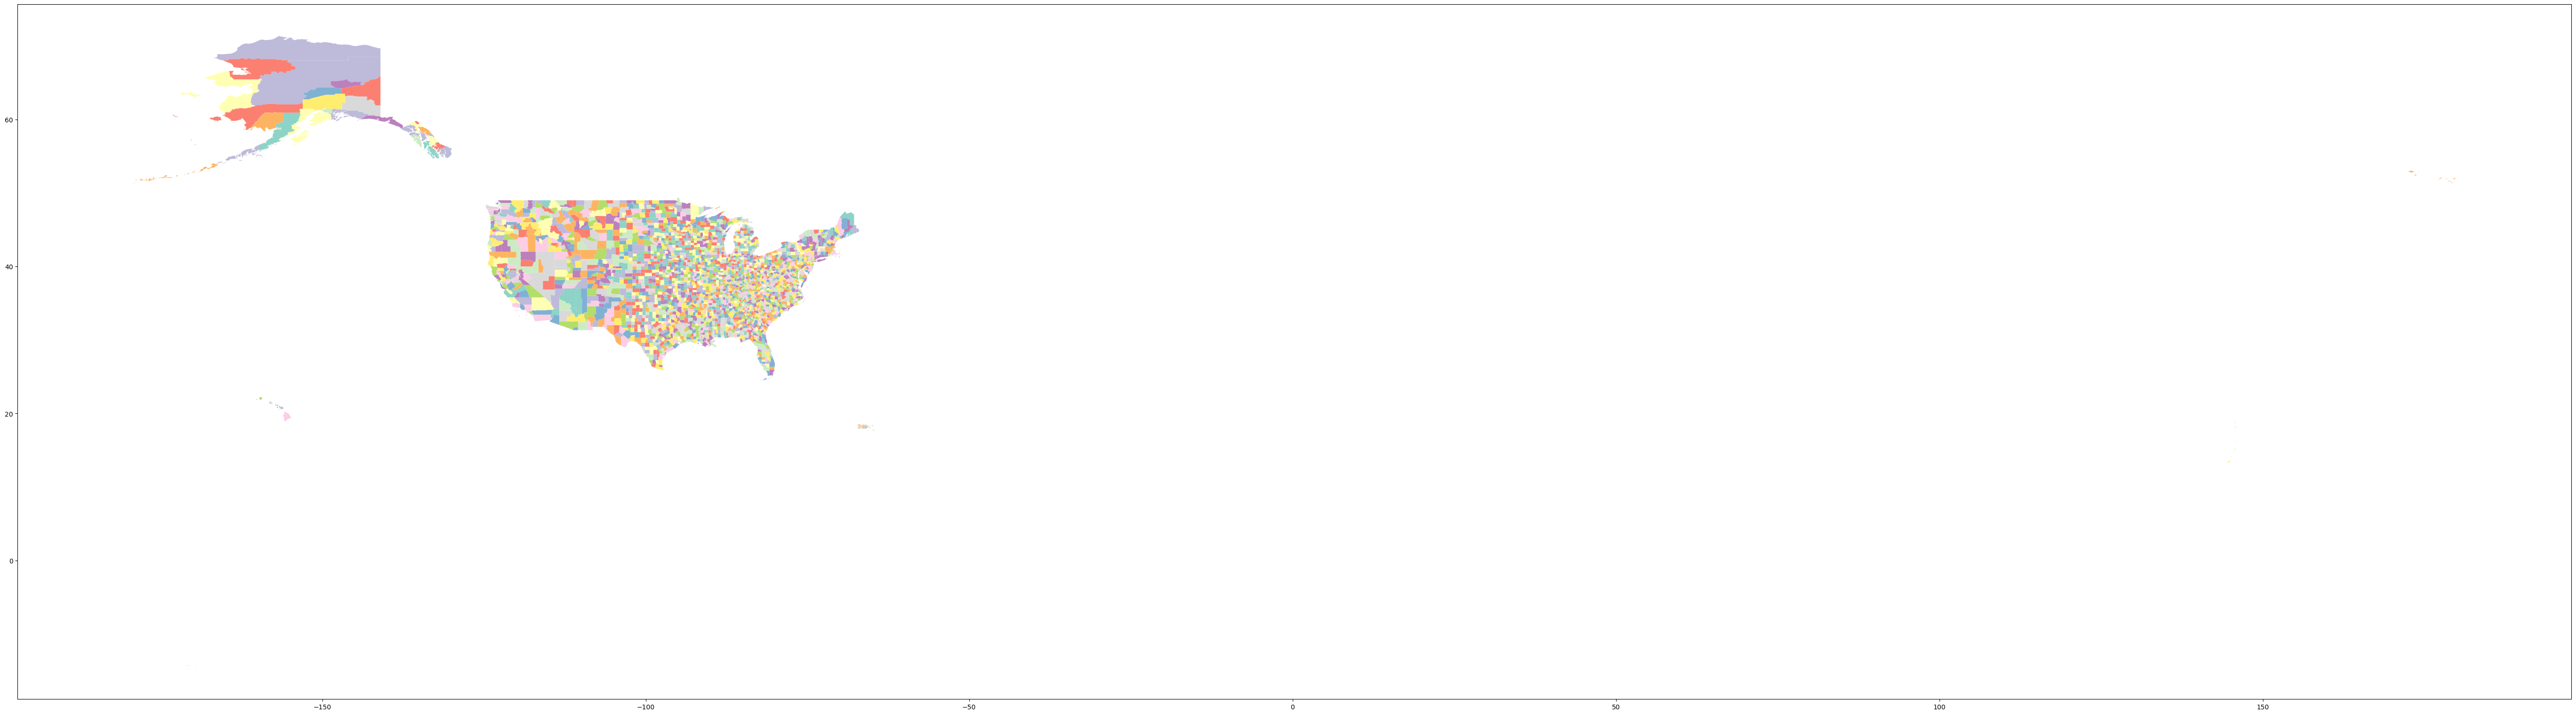

In [24]:
USAMAP = allcounties.plot(figsize=(70,70), cmap = 'Set3')
USAMAP

In [25]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
allcounties

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,01,059,00161555,0500000US01059,01059,Franklin,Franklin County,AL,Alabama,06,1641845708,32639621,"POLYGON ((-88.16591 34.38093, -88.16563 34.383..."
1,06,057,01682927,0500000US06057,06057,Nevada,Nevada County,CA,California,06,2480587301,41531993,"POLYGON ((-121.27953 39.23054, -121.25918 39.2..."
2,26,031,01622958,0500000US26031,26031,Cheboygan,Cheboygan County,MI,Michigan,06,1852564001,440607445,"POLYGON ((-84.73269 45.28938, -84.73239 45.787..."
3,29,119,00758518,0500000US29119,29119,McDonald,McDonald County,MO,Missouri,06,1397155452,520251,"POLYGON ((-94.61831 36.76656, -94.06890 36.747..."
4,31,157,00835900,0500000US31157,31157,Scotts Bluff,Scotts Bluff County,NE,Nebraska,06,1915576079,15402683,"POLYGON ((-104.05293 41.90614, -104.05299 41.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,13,301,00347777,0500000US13301,13301,Warren,Warren County,GA,Georgia,06,736483608,6034478,"POLYGON ((-82.86661 33.46660, -82.82314 33.504..."
3230,06,023,01681908,0500000US06023,06023,Humboldt,Humboldt County,CA,California,06,9241565229,1253726036,"POLYGON ((-124.40860 40.44320, -124.39664 40.4..."
3231,34,023,00882230,0500000US34023,34023,Middlesex,Middlesex County,NJ,New Jersey,06,800946845,35291196,"POLYGON ((-74.63060 40.33960, -74.62024 40.373..."
3232,13,311,00326781,0500000US13311,13311,White,White County,GA,Georgia,06,623524633,3917258,"POLYGON ((-83.87121 34.66490, -83.87251 34.683..."


In [ ]:
allcounties.rename(columns = {'NAME':'County', 'STATE_NAME':'State'}, inplace = True)
allcounties

In [ ]:
hopeful = pd.merge(left = allcounties, right = counties_all, how='inner',
                    on = ('County', 'State'))
hopeful

In [ ]:
fig, ax = plt.subplots(figsize=(16,4))
hopeful.plot(ax = ax);

In [ ]:
fig, ax = plt.subplots(figsize=(70,70))
hopeful.plot(column = 'Life Expectancy', 
              cmap = 'GnBu',  
              legend = True,
              ax = ax)
ax.axis('off');

In [ ]:
fig, ax = plt.subplots(figsize=(70,70))
hopeful.plot(column = 'Median Household Income', 
              cmap = 'GnBu',  
              legend = True,
              ax = ax)
ax.axis('off');

In [ ]:
fig, ax = plt.subplots(figsize=(70,70))
hopeful.plot(column = 'Quality of Life', 
              cmap = 'GnBu',  
              legend = True,
              ax = ax)
ax.axis('off');

In [ ]:
fig, ax = plt.subplots(figsize=(70,70))
hopeful.plot(column = 'Adult Obesity', 
              cmap = 'GnBu',  
              legend = True,
              ax = ax)
ax.axis('off');

In [ ]:
map = folium.Map(location=hopeful.geometry, zoom_start=14, control_scale=True)
map

In [ ]:
map = folium.Map(location=[bike_station_locations.Latitude.mean(), bike_station_locations.Longitude.mean()], zoom_start=14, control_scale=True

In [ ]:
hopeful.crs

In [ ]:
hopeful = hopeful.to_crs(epsg=4269)
print(hopeful.crs)
hopeful.head()

In [ ]:
hopeful.plot(figsize=(6, 6))
plt.show()

In [ ]:
m = folium.Map(location=[40.70, -73.94], zoom_start=10, tiles='CartoDB positron')
m

In [ ]:
for _, r in hopeful.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['County']).add_to(geo_j)
    geo_j.add_to(m)

In [ ]:
# Project to NAD83 projected crs
hopeful = hopeful.to_crs(epsg=4269)

# Access the centroid attribute of each polygon
hopeful['centroid'] = hopeful.centroid

In [ ]:
# geometry (active) column
hopeful = hopeful.to_crs(epsg=4269)

# Centroid column
hopeful['centroid'] = hopeful['centroid'].to_crs(epsg=4269)

hopeful.head()

In [ ]:
##for _, r in hopeful.iterrows():
    #lat = r['centroid'].y
    #lon = r['centroid'].x
    #folium.Marker(location=[lat, lon],
                  #popup='length: {} <br> area: {}'.format(r['ALAND'], r['AWATER'])).add_to(m)

In [ ]:
hopeful.plot()

In [ ]:
m